<a href="https://colab.research.google.com/github/Raphok90/Datacamp/blob/main/Choloate_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/chocolate-sales")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chocolate-sales


In [9]:
import pandas as pd
import numpy as np


In [10]:
from google.colab import files

uploaded = files.upload()


Saving Chocolate Sales.csv to Chocolate Sales.csv


In [12]:
df = pd.read_csv('Chocolate Sales.csv')

In [13]:
print(df.head())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco   4-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars   1-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes   7-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [16]:
import pandas as pd

df = pd.read_csv("Chocolate Sales.csv")

print(df.head())
df.info()


     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco   4-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars   1-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes   7-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null 

In [17]:
# Remove $ and commas, convert to float
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')


In [18]:
total_sales = df['Amount'].sum()
print(f"Total Sales: ${total_sales:,.2f}")


Total Sales: $6,183,625.00


In [19]:
top_sales_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
print(top_sales_person)


Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Andria Kimpton         201747.0
Mallorie Waber         200592.0
Camilla Castle         196616.0
Dotty Strutley         190624.0
Wilone O'Kielt         138523.0
Name: Amount, dtype: float64


In [20]:
top_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
print(top_product)


Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64


In [21]:
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
print(sales_by_country)


Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64


In [23]:
sales_by_country = df.groupby('Country')['Amount'].sum()
print(sales_by_country)

Country
Australia      1137367.0
Canada          962899.0
India          1045800.0
New Zealand     950418.0
UK             1051792.0
USA            1035349.0
Name: Amount, dtype: float64


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

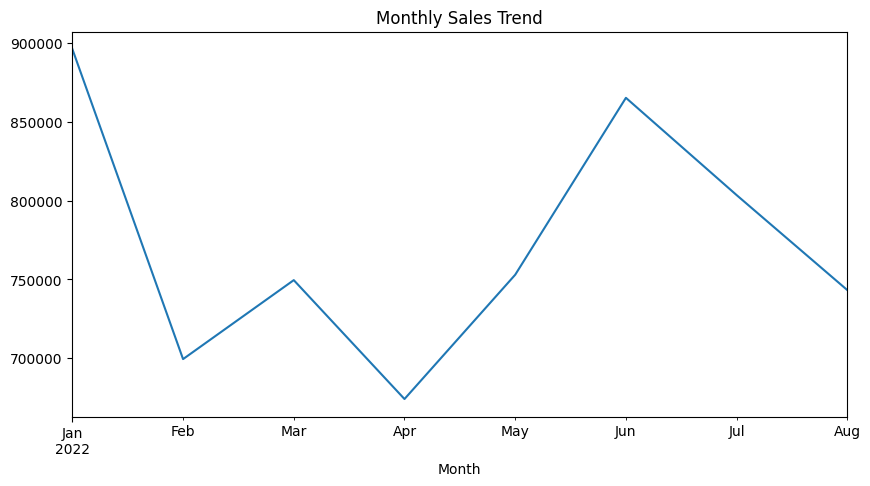

In [24]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Amount'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10, 5))


In [25]:
best_month = monthly_sales.idxmax()
best_month_value = monthly_sales.max()
print(f"Best Month: {best_month}, Sales: ${best_month_value:,.2f}")


Best Month: 2022-01, Sales: $896,105.00


In [26]:
top_5_sales = df.sort_values(by='Amount', ascending=False).head()
print(top_5_sales)


            Sales Person      Country              Product       Date  \
543         Ches Bonnell        India  Peanut Butter Cubes 2022-01-27   
135          Van Tuxwell        India  Organic Choco Syrup 2022-05-16   
751  Rafaelita Blaksland  New Zealand              Eclairs 2022-02-07   
66           Van Tuxwell    Australia  Organic Choco Syrup 2022-08-10   
589       Curtice Advani        India   Smooth Sliky Salty 2022-04-19   

      Amount  Boxes Shipped    Month  
543  22050.0            208  2022-01  
135  19929.0            174  2022-05  
751  19481.0             51  2022-02  
66   19453.0             14  2022-08  
589  19327.0            135  2022-04  


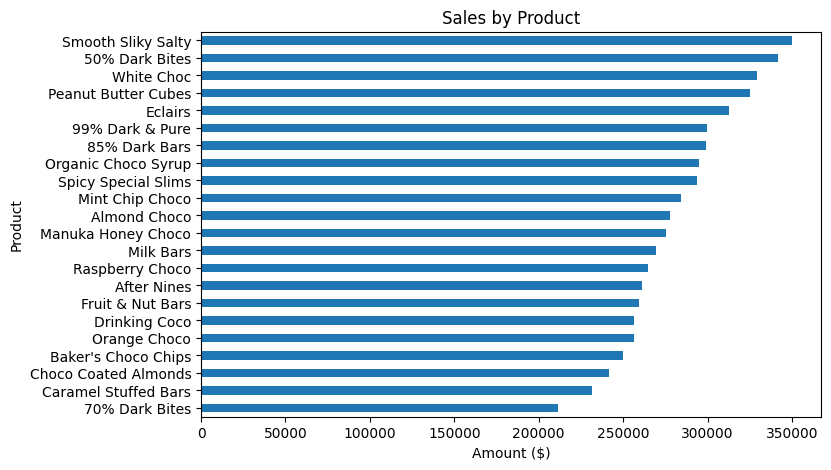

In [27]:
import matplotlib.pyplot as plt

df.groupby('Product')['Amount'].sum().sort_values().plot(kind='barh', title='Sales by Product', figsize=(8,5))
plt.xlabel("Amount ($)")
plt.show()
